# Table of Contents

01. Importing libraries
02. Importing data
03. The elbow technique
04. k-means clustering
    1) Plots
    2) Plot Analysis
    3) Cluster summary statistics

## 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

## 02. Importing data

In [3]:
# create a variable to store the main project folder path

path=r'/Users/tejas/Documents/CareerFoundry_DataAnalytics/Data Immersion/A6/Hotel Booking'

In [4]:
# import the cleaned data set

df=pd.read_csv(os.path.join(path,'Data','Prepared Data','hotel_booking_cleaned.csv'))

In [5]:
df.shape

(86916, 35)

In [6]:
df.head()

,Unnamed: 0,hotel,is_canceled,lead_time,cancellation_rate,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,arrival_date,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,32.56,2015,July,27,1,2015-07-01,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,69,34.82,2015,July,27,1,2015-07-01,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,12.75,2015,July,27,1,2015-07-01,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,20.26,2015,July,27,1,2015-07-01,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,21.43,2015,July,27,1,2015-07-01,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
df.columns

Index(['Unnamed: 0', 'hotel', 'is_canceled', 'lead_time', 'cancellation_rate',
       'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'arrival_date', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'stays_in_total_nights', 'adults', 'kids',
       'total_guests', 'guest_type', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
# create a df of only numerical variables

df_2 = df[['lead_time', 'cancellation_rate', 'stays_in_total_nights', 'total_guests', 'adults', 'kids', 'booking_changes',
           'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']]

## 03. The elbow technique

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(df_2).score(df_2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-886012513.2494982,
 -429113636.87234604,
 -309125690.91486126,
 -224392705.74497473,
 -187803528.74846634,
 -157108224.16126412,
 -136004633.10745168,
 -122599929.69099963,
 -109885633.9042114]

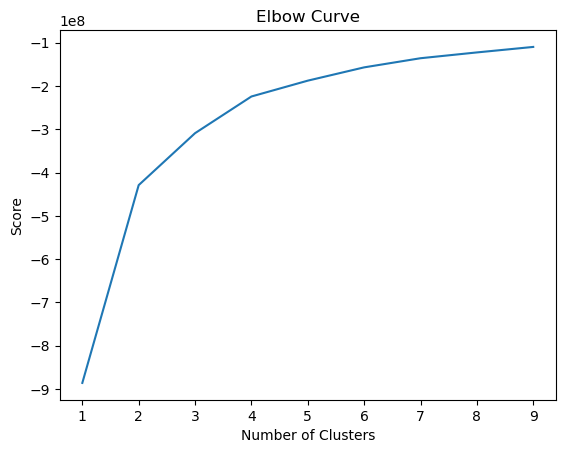

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### The elbow, or the breaking point of the curve, is where the curve begins to flatten out. From the above plot we can see the curve rises only slightly after 4. Therefore, 4 has been identified as the optimum amount of clusters.

## 04. k-means clustering

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4)

In [13]:
# Fit the k-means object to the data.

kmeans.fit(df_2)

KMeans(n_clusters=4)

In [14]:
df_2['clusters'] = kmeans.fit_predict(df_2)

/var/folders/2h/_s5xdl454jl0v5r_lr835n9c0000gn/T/ipykernel_76841/1948498210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['clusters'] = kmeans.fit_predict(df_2)


In [15]:
df_2.head()

,lead_time,cancellation_rate,stays_in_total_nights,total_guests,adults,kids,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,clusters
0,342,32.56,0,2,2,0,3,0,0.0,0,0,1
1,69,34.82,0,2,2,0,4,0,0.0,0,0,2
2,7,12.75,1,1,1,0,0,0,75.0,0,0,2
3,13,20.26,1,1,1,0,0,0,75.0,0,0,2
4,14,21.43,2,2,2,0,0,0,98.0,0,1,2


In [16]:
df_2.describe()

,lead_time,cancellation_rate,stays_in_total_nights,total_guests,adults,kids,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,clusters
count,86916.000000,86916.000000,86916.000000,86916.000000,86916.000000,86916.000000,86916.000000,86916.000000,86916.000000,86916.000000,86916.000000,86916.000000
mean,79.796217,27.506715,3.567180,2.025174,1.880413,0.144760,0.256431,0.009814,106.561198,0.084369,0.698456,1.716796
std,85.717651,12.072981,2.453392,0.700957,0.495960,0.459617,0.635275,0.098579,51.890154,0.279469,0.831787,1.065296
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,20.260000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000,1.000000
50%,49.000000,30.280000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,98.400000,0.000000,0.000000,2.000000
75%,125.000000,34.680000,5.000000,2.000000,2.000000,0.000000,0.000000,0.000000,134.100000,0.000000,1.000000,2.000000
max,594.000000,100.000000,16.000000,5.000000,4.000000,3.000000,5.000000,1.000000,510.000000,3.000000,5.000000,3.000000


In [17]:
df_2['clusters'].value_counts()

2    37910
3    21629
0    18867
1     8510
Name: clusters, dtype: int64

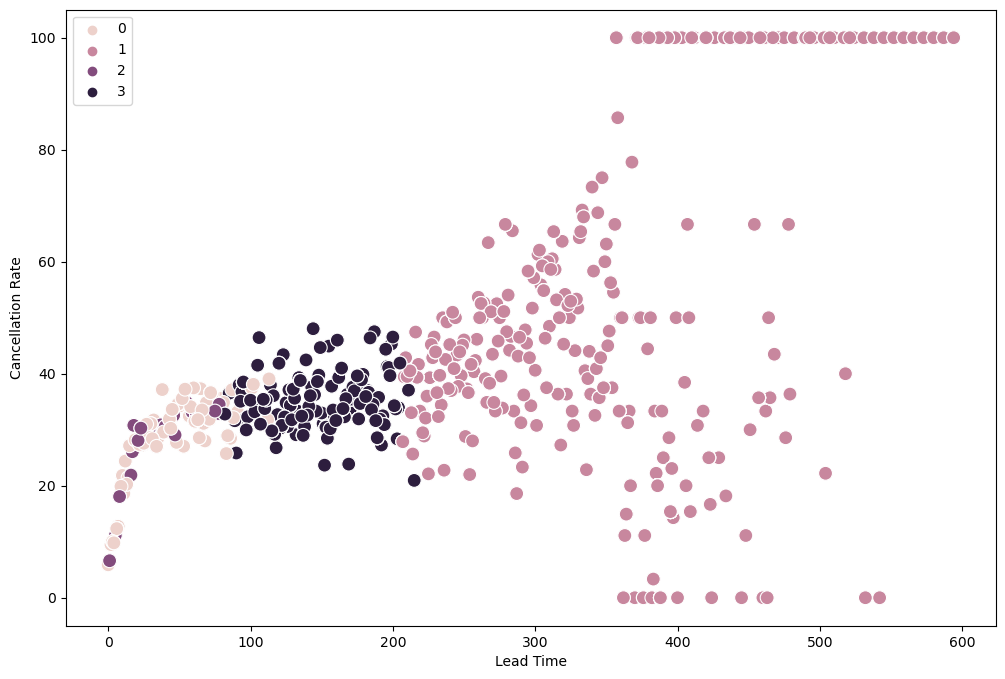

In [18]:
# Plot the clusters for the 'cancellation_rate' and 'lead_time' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['lead_time'], y=df_2['cancellation_rate'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Lead Time') # Label x-axis.
plt.ylabel('Cancellation Rate') # Label y-axis.
plt.show()

### From the above plot
#### 'lead_time' and 'cancellation_rate' : The pink cluster, which is the most populated, gathers points with a high lead time ( >200 days) in booking and generally high cancellations, with the exclusion of some extreme values at the top and bottom of the cancellation_rate range. The black cluster, second most populated, includes points that have a lead time between 100 to 200 days. It indicates that bookings made during this time period has a cancellation rate of 20-45%, lower than the pink cluster. The light pink cluster contains the points with low lead time, roughly around 100 days having a cancellation rate less than 40%. This cluster is overlapped with the most scarse cluster, in purple. This cluster has very points with a lead time of less than 100 and most cancellations less than 30%.

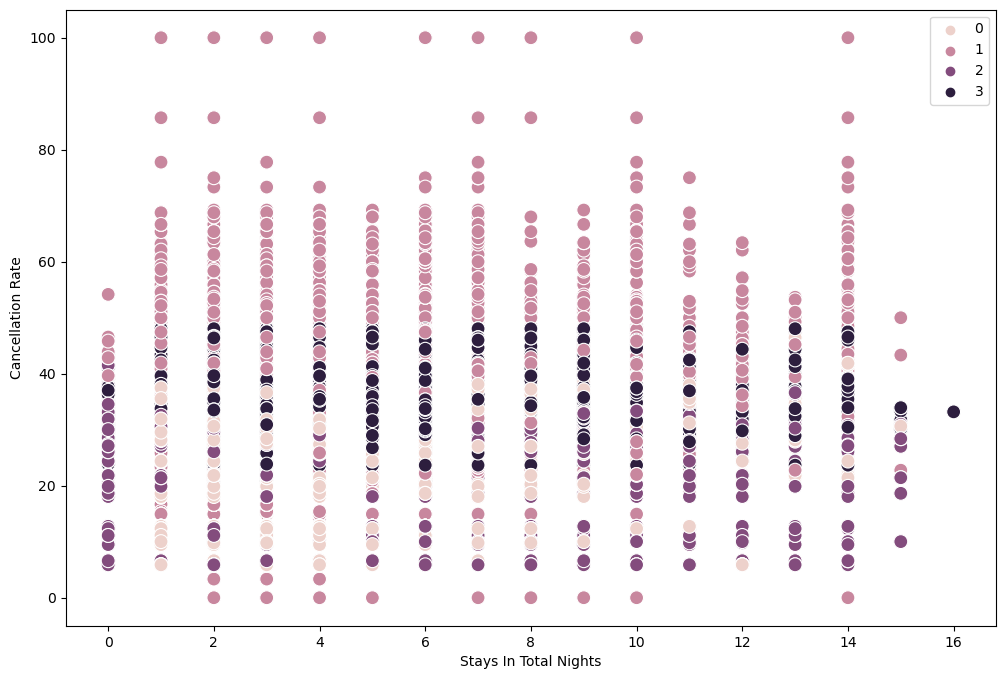

In [19]:
# Plot the clusters for the 'stays_in_total_nights' and 'cancellation_rate' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['stays_in_total_nights'], y=df_2['cancellation_rate'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Stays In Total Nights') # Label x-axis.
plt.ylabel('Cancellation Rate') # Label y-axis.
plt.show()

### 'stays_in_total_nights' and 'cancellation_rate' : No significant relationship or pattern identified from this plot except for maybe the pink cluster contains points with a high cancellation rate when the stay duration is for a week or less. 

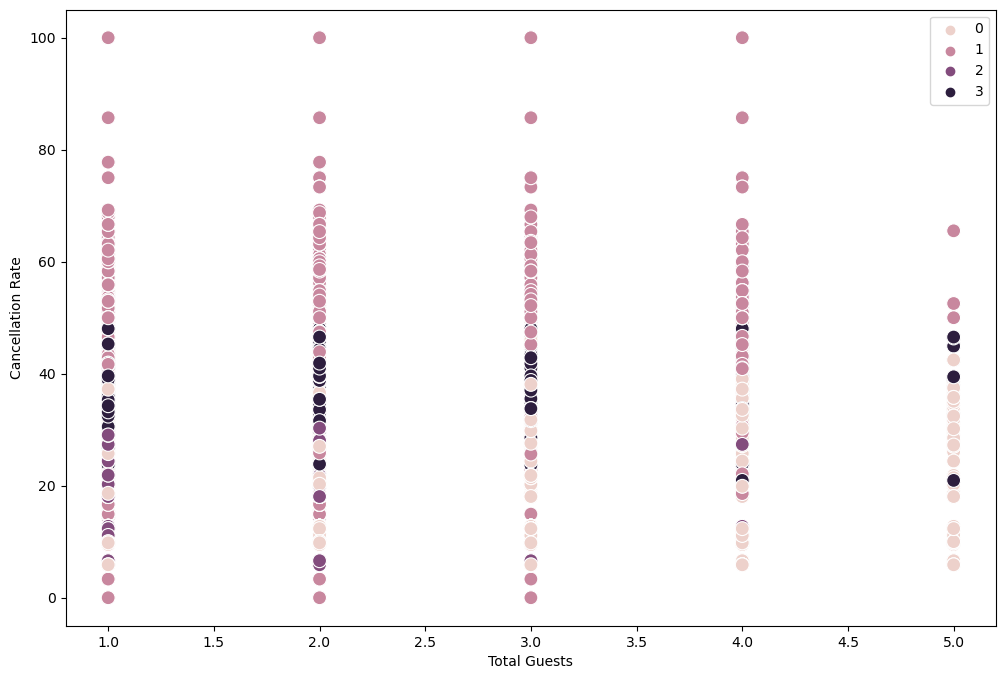

In [20]:
# Plot the clusters for the 'cancellation_rate' and 'total_guests' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['total_guests'], y=df_2['cancellation_rate'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total Guests') # Label x-axis.
plt.ylabel('Cancellation Rate') # Label y-axis.
plt.show()

### 'total_guests' and 'cancellation_rate' : The pink cluster gathers points with a high cancellation rate ( > 50%). It implies that a high cancellation is observed when the booking is made by couple guests, followed by solo travelers. The light pink cluster denotes that guests traveling in groups tend to have less cancellations than other types of guests.

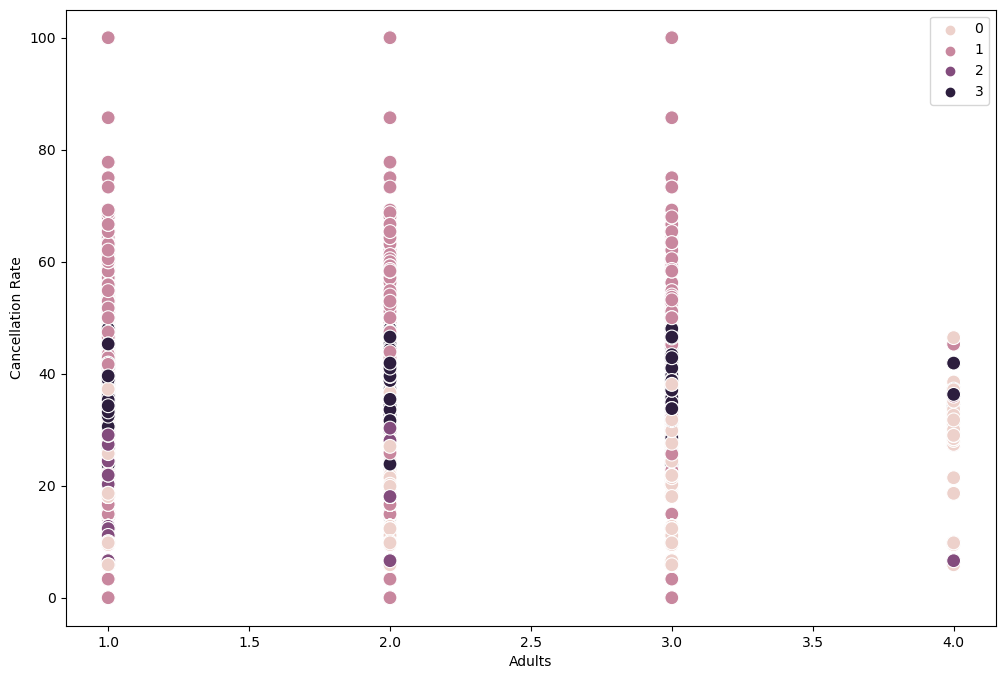

In [21]:
# Plot the clusters for the 'adults' and 'total_guests' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['adults'], y=df_2['cancellation_rate'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Adults') # Label x-axis.
plt.ylabel('Cancellation Rate') # Label y-axis.
plt.show()

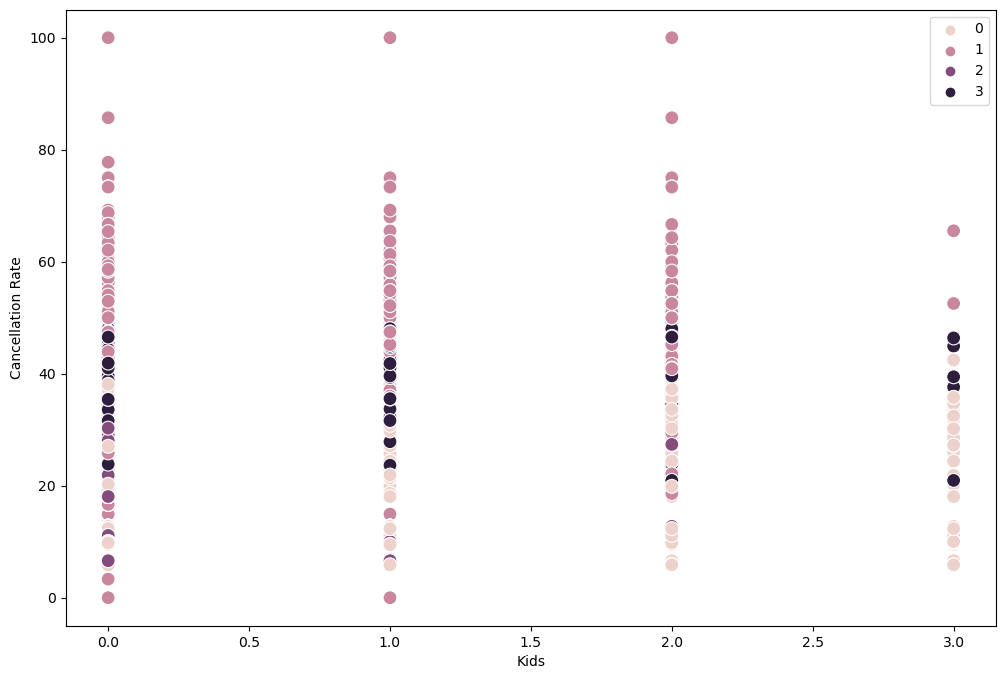

In [22]:
# Plot the clusters for the 'kids' and 'total_guests' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['kids'], y=df_2['cancellation_rate'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Kids') # Label x-axis.
plt.ylabel('Cancellation Rate') # Label y-axis.
plt.show()

### 'adults' and 'cancellation_rate' & 'kids' and cancellation_rate' : Clusters in these two plots have the same pattern as in the 'total_guests' and 'cancellation_rate' plot.

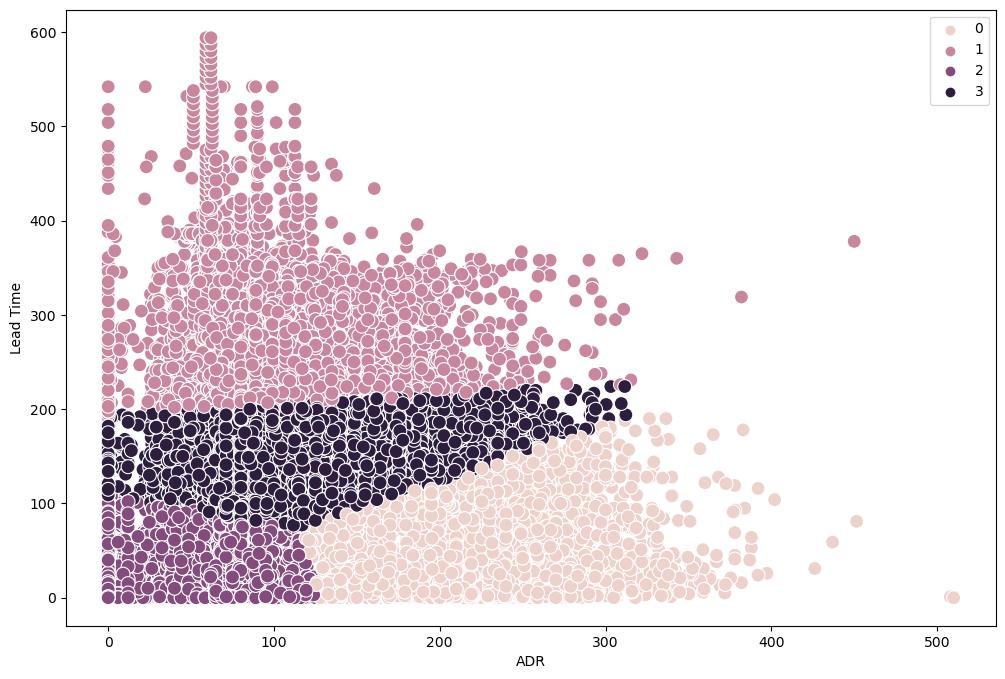

In [23]:
# Plot the clusters for the 'adr' and 'lead_time' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['adr'], y=df_2['lead_time'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('ADR') # Label x-axis.
plt.ylabel('Lead Time') # Label y-axis.
plt.show()

### 'adr' and 'lead_time' : The most populated cluster, in pink, indicates a high lead time. The points in this cluster do not have a high ADR, with only a few points scattered around 300. In fact, quite a few points from the black cluster have a higher ADR of more than 300. The black cluster contains points having less lead time. A high lead time indicates less ADR and conversely a low lead time indicates relatively high ADR. As already seen previously, a high lead time, generally, also implies a high cancellation rate. To put it simply, low lead time denotes lower cancellation rate and higher ADR. It can therefore be inferred that reducing the lead time will help the hotel businesses to gain more profit.

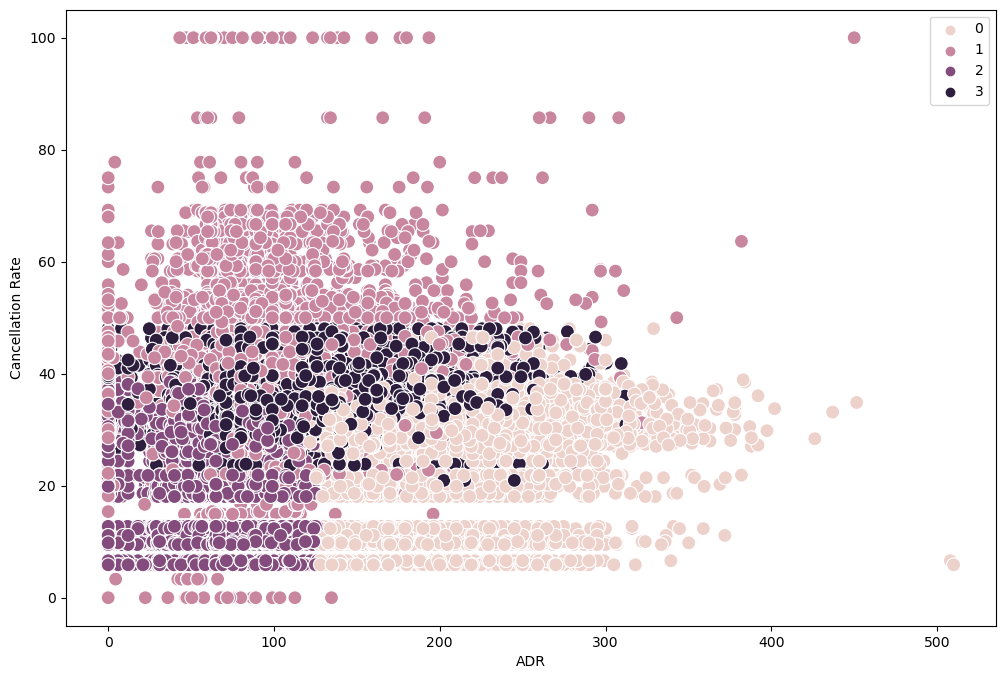

In [24]:
# Plot the clusters for the 'cancellation_rate' and 'adr' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['adr'], y=df_2['cancellation_rate'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('ADR') 
plt.ylabel('Cancellation Rate') 
plt.show()

### 'adr' and 'cancellation_rate' : The pink cluster contains points with a high cancellation rate (with the exception of some values in the bottom range of cancellation_rate). Most of these points have an average ADR. As depicted by the pink cluster, bookings with the highest cancellation rate have a relatively less ADR. On the other hand, bookings with low cancellation rate have higher ADR, as shown by the black cluster. This pattern is similar to the one just observed in the previous plot of 'lead_time' and 'cancellation_rate'.

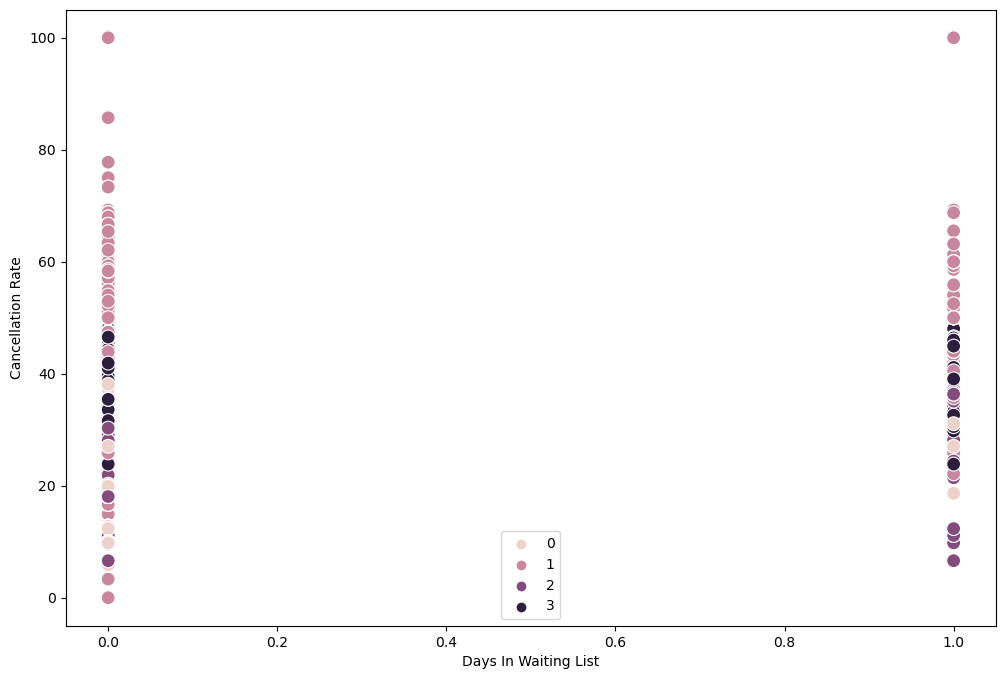

In [25]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['days_in_waiting_list'], y=df_2['cancellation_rate'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Days In Waiting List') 
plt.ylabel('Cancellation Rate') 
plt.show()

### 'days_in_waiting_list' and 'cancellation_rate' : No significant or interesting pattern identified from this plot.

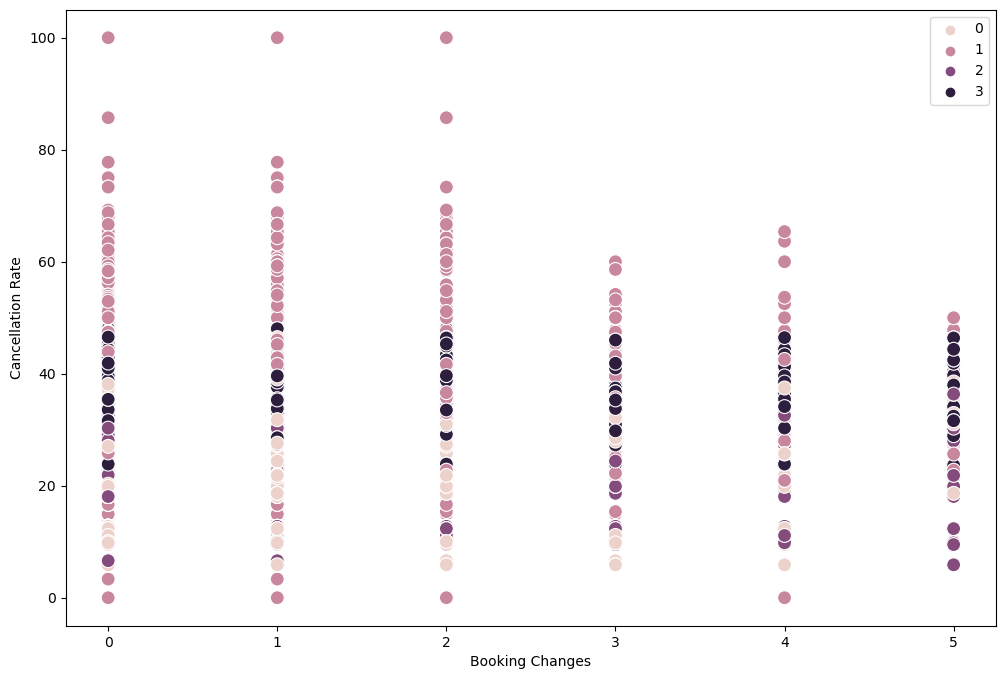

In [26]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['booking_changes'], y=df_2['cancellation_rate'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Booking Changes') 
plt.ylabel('Cancellation Rate') 
plt.show()

### 'booking_changes' and 'cancellation_rate' : The pink cluster indicates highest cancellation rate when there are fewer booking changes. On the other hand, light pink cluster indicates lower cancellation rate than pink cluster when there are high booking changes. Similarly, purple cluster also indicates some of the lowest cancellation for increased number of booking changes. So, bookings that have a high cancellation have less booking changes.

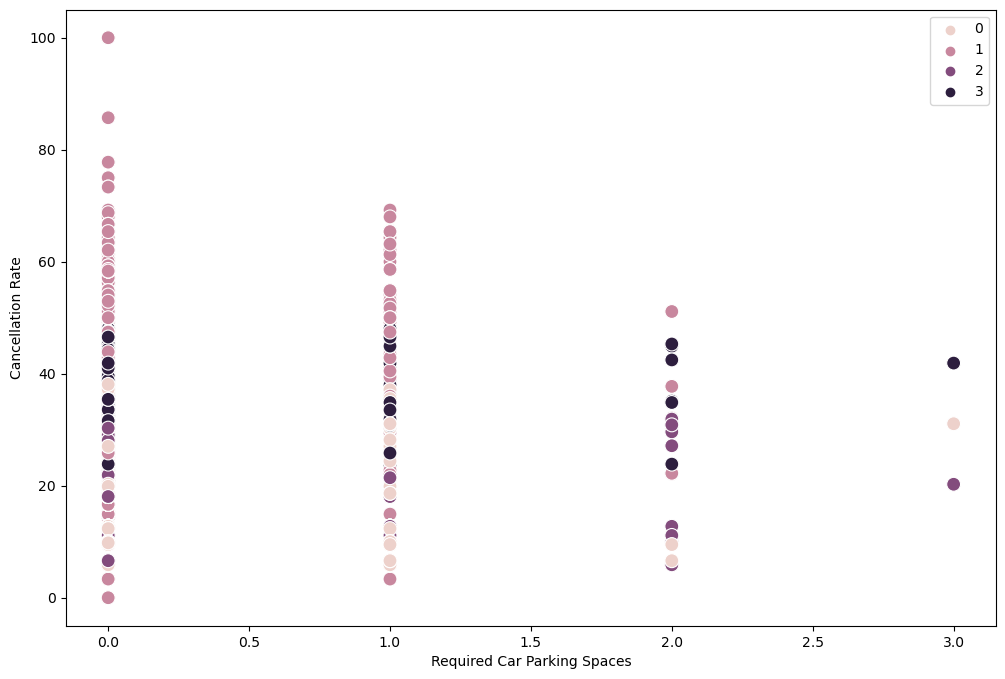

In [27]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['required_car_parking_spaces'], y=df_2['cancellation_rate'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Required Car Parking Spaces') 
plt.ylabel('Cancellation Rate') 
plt.show()

### 'required_car_parking_spaces' and 'cancellation_rate' : Identical to the pattern observed in previous plot, the pink cluster denotes points having a high cancellation rate with less car parking spaces.

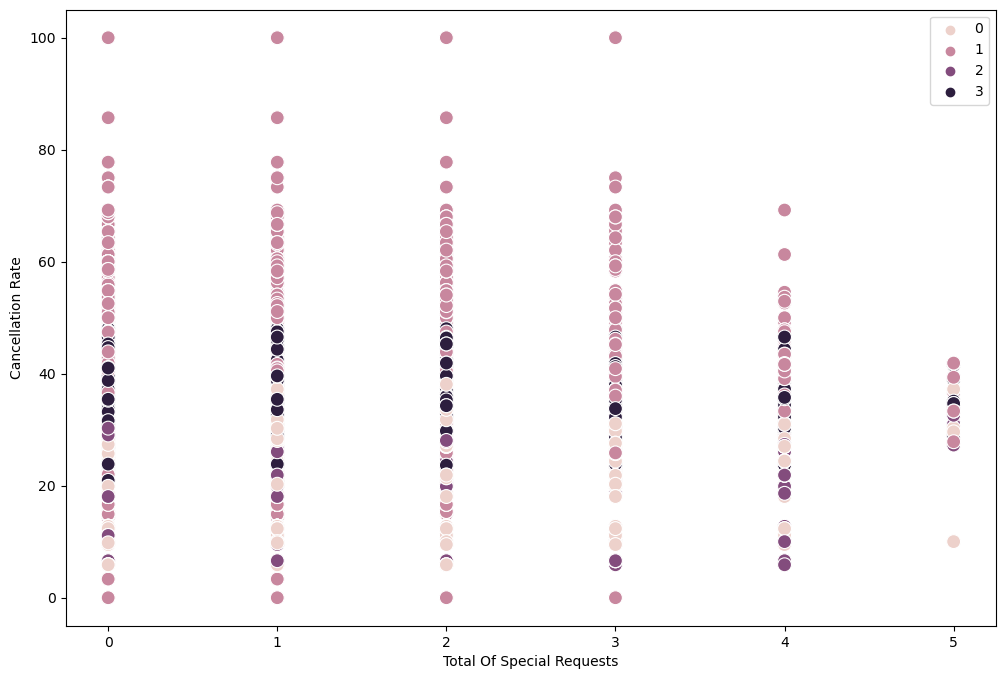

In [28]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['total_of_special_requests'], y=df_2['cancellation_rate'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Total Of Special Requests') 
plt.ylabel('Cancellation Rate') 
plt.show()

### 'total_of_special_requests' and 'cancellation_rate' : The pink cluster again denotes points with high cancellation having fewer number of special requests.

In [29]:
df_2.loc[df_2['clusters'] == 3, 'cluster'] = 'black'
df_2.loc[df_2['clusters'] == 2, 'cluster'] = 'purple'
df_2.loc[df_2['clusters'] == 1, 'cluster'] = 'pink'
df_2.loc[df_2['clusters'] == 0, 'cluster'] = 'light pink'

/var/folders/2h/_s5xdl454jl0v5r_lr835n9c0000gn/T/ipykernel_76841/118447662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[df_2['clusters'] == 3, 'cluster'] = 'black'


In [30]:
df_2.groupby('cluster').agg({'lead_time':['mean', 'median'],
                             'cancellation_rate':['mean', 'median'], 
                             'booking_changes':['mean', 'median'],
                             'total_of_special_requests':['mean', 'median'],
                             'required_car_parking_spaces':['mean', 'median'],
                             'adr':['mean', 'median'],
                             'total_guests':['mean', 'median']})

lead_time        cancellation_rate        booking_changes         \
                  mean median              mean median            mean median   
cluster                                                                         
black       138.320496  136.0         35.021246  34.55        0.280734    0.0   
light pink   36.487200   29.0         25.198904  28.55        0.245508    0.0   
pink        272.143831  256.0         40.611127  39.66        0.372150    0.0   
purple       24.782010   16.0         21.426290  26.07        0.222026    0.0   

           total_of_special_requests        required_car_parking_spaces  \
                                mean median                        mean   
cluster                                                                   
black                       0.740441    1.0                    0.057145   
light pink                  0.841469    1.0                    0.107807   
pink                        0.720799    0.0                    0.044771   
purple                      0.598312    0.0                    0.097125   

                          adr         total_guests         
           median        mean  median         mean median  
cluster                                                    
black         0.0  109.185262  105.61     2.131028    2.0  
light pink    0.0  171.549477  160.00     2.384004    2.0  
pink          0.0   95.970038   90.00     2.057462    2.0  
purple        0.0   75.098287   78.00     1.778950    2.0

### The pink cluster has the most useful stats in almost all categories. The lead time is highest for these bookings along with the highest cancellation rate. The number of booking changes, special requests, car parking space, ADR and total guests is on the lower side for these bookings. This analysis also suggested that there is not one driving numeric variable that influences hotel booking cancellation. Cancellation is also driven by categorical variable such as the type of guest, deposit made or even the country of origin of the guest (as seen in previous geospatial analyses).